### Data Summary

> The dataset comprises data on the academic achievement of high school students in mathematics, encompassing both their grades and demographic details. The data has been procured from three American high schools. This dataset has the potential to serve various research inquiries concerning education, such as analyzing the influence of parental education or test preparation courses on students' academic performance. Moreover, it could be utilized to construct machine learning models that can anticipate student performance based on various factors, including demographics.

### Features



> `Gender`: The gender of the student (male/female).


> `Race/ethnicity`: The student's racial or ethnic background (Asian, African-American, Hispanic, etc.).

> `Parental level of education`: The highest level of education attained by the student's parent(s) or guardian(s).

> `Lunch`: Whether the student receives free or reduced-price lunch (yes/no).

> `Test preparation course`: Whether the student completed a test preparation course (yes/no).

> `Math score`: The student's score on a standardized mathematics test.

> `Reading score`: The student's score on a standardized reading test.

> `Writing score`: The student's score on a standardized writing test.






In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [3]:
Data = pd.read_csv("/content/exams.csv")
Data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


##Handling Missing Data

There is no missing data in any of these columns.

In [4]:
Data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [10]:
for single_column in Data.columns:
  print(single_column)
  print(Data[single_column].isnull().value_counts())

gender
False    1000
Name: gender, dtype: int64
race/ethnicity
False    1000
Name: race/ethnicity, dtype: int64
parental level of education
False    1000
Name: parental level of education, dtype: int64
lunch
False    1000
Name: lunch, dtype: int64
test preparation course
False    1000
Name: test preparation course, dtype: int64
math score
False    1000
Name: math score, dtype: int64
reading score
False    1000
Name: reading score, dtype: int64
writing score
False    1000
Name: writing score, dtype: int64


###Exploratory Data Analysis

*   math score, reading score and writing score column is negatively skewed.
*   Male students have scored more in maths as compared to female students.
*   Female students have scored more in reading and writing as compared to male students.
*   Group E Ethnicity students have scored the highest in maths, reading and writing.
*   Group E parental level of education is diverse but maximum parents have attended college still the students have scored the highest.
*   Group E 67.8% students were on standard lunch.
*   Group E 65.7% students havn't taken the test preparation courses.
*   Parents that have an associate's degree have kids with highest reading score.
*   Students that have completed test preparation courses have highest scores in reading, writing and maths.








In [12]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [105]:
Data["math score"].skew()

-0.2812004329478628

In [106]:
Data["reading score"].skew()

-0.18350548645836867

In [107]:
Data["writing score"].skew()

-0.2145739006187218

<Axes: xlabel='gender', ylabel='math score'>

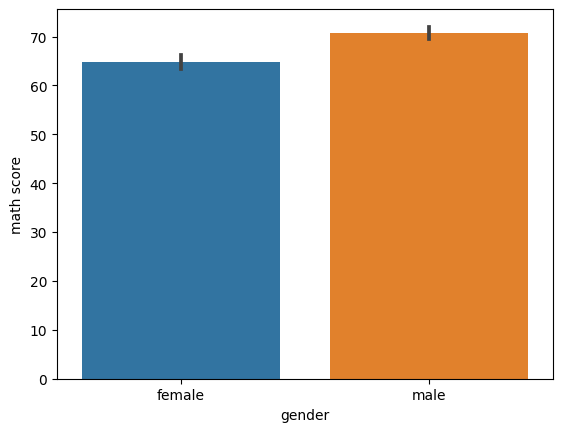

In [37]:
sb.barplot(x = "gender", y = "math score", data = Data)

<Axes: xlabel='gender', ylabel='reading score'>

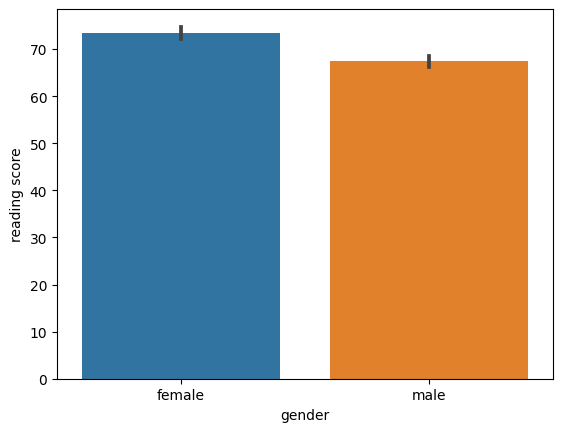

In [38]:
sb.barplot(x = "gender", y = "reading score", data = Data)

<Axes: xlabel='gender', ylabel='writing score'>

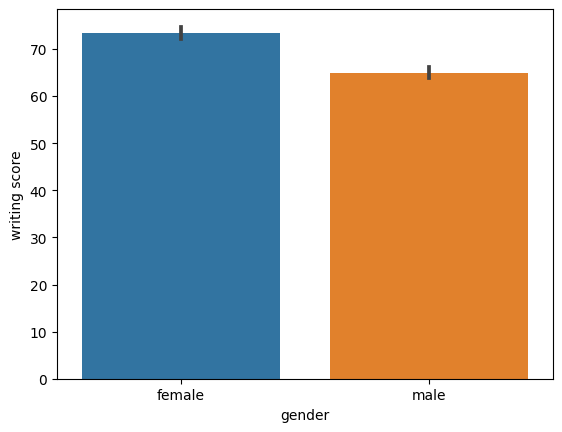

In [39]:
sb.barplot(x = "gender", y = "writing score", data = Data)

<Axes: xlabel='gender', ylabel='math score'>

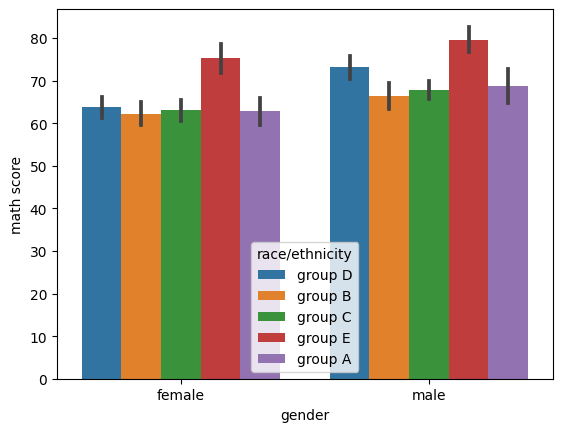

In [43]:
sb.barplot(x = "gender", y = "math score", data = Data, hue = 'race/ethnicity')

<Axes: xlabel='gender', ylabel='reading score'>

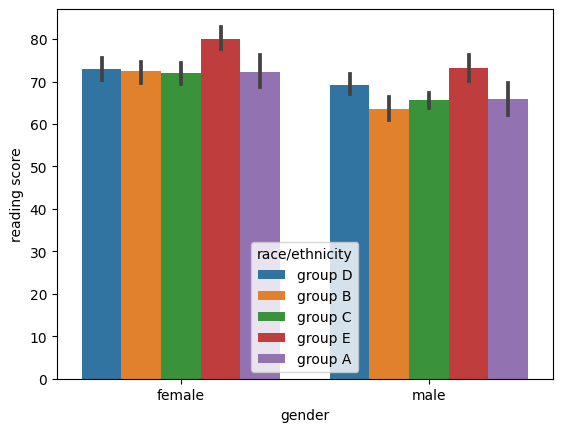

In [44]:
sb.barplot(x = "gender", y = "reading score", data = Data, hue = 'race/ethnicity')

<Axes: xlabel='gender', ylabel='writing score'>

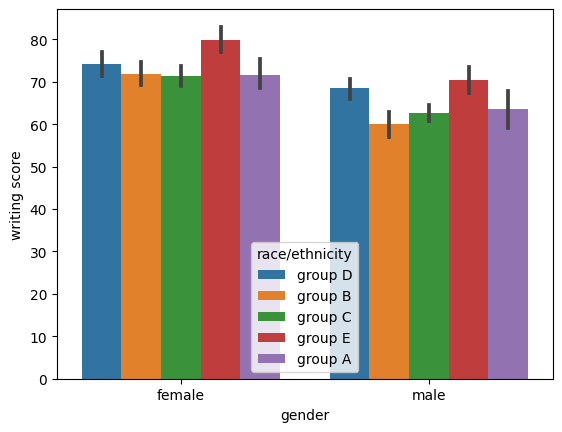

In [45]:
sb.barplot(x = "gender", y = "writing score", data = Data, hue = 'race/ethnicity')

([<matplotlib.patches.Wedge at 0x7fee8a4e0be0>,
 [Text(0.7905273218579558, 0.7648964331176399, 'some college'),
  Text(-0.6831362504571893, 0.8621628983616104, 'high school'),
  Text(-1.024171210296393, -0.4013394224344552, 'some high school'),
  Text(-0.10857041380468635, -1.0946289166865086, "associate's degree"),
  Text(0.7384349966135273, -0.8152997950302577, "bachelor's degree"),
  Text(1.061995395494007, -0.2866457394581822, "master's degree")],
 [Text(0.4311967210134304, 0.41721623624598536, '24.5%'),
  Text(-0.37261977297664867, 0.4702706718336056, '22.4%'),
  Text(-0.5586388419798506, -0.21891241223697552, '18.2%'),
  Text(-0.05922022571164709, -0.597070318192641, '16.8%'),
  Text(0.4027827254255603, -0.44470897910741325, '9.8%'),
  Text(0.5792702157240037, -0.15635222152264483, '8.4%')])

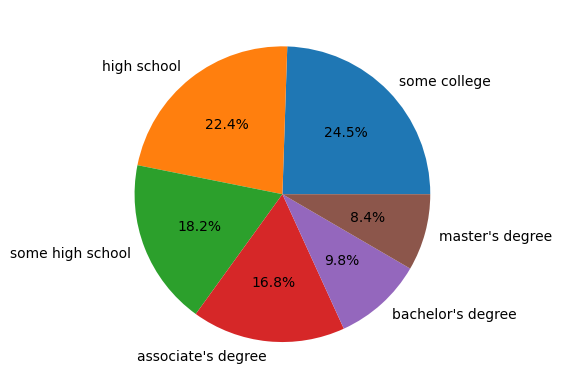

In [102]:
Group_E = Data[Data["race/ethnicity"] == "group E"]
Group_E_Parents_Education = Group_E["parental level of education"].value_counts().to_dict()
Group_E_lunch = Group_E["lunch"].value_counts().to_dict()
Group_E_Test_Course = Group_E["test preparation course"].value_counts().to_dict()
plt.pie(np.array(list(Group_E_Parents_Education.values())), labels = list(Group_E_Parents_Education.keys()), autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7fee8c8cfdc0>,
 [Text(-0.5845042627829262, 0.9318555503878206, 'standard'),
  Text(0.5845041755363103, -0.9318556051130553, 'free/reduced')],
 [Text(-0.31882050697250514, 0.5082848456660839, '67.8%'),
  Text(0.31882045938344195, -0.5082848755162119, '32.2%')])

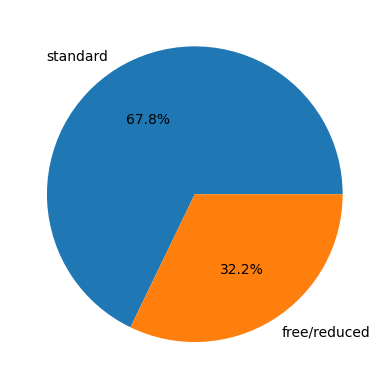

In [103]:
plt.pie(np.array(list(Group_E_lunch.values())), labels = list(Group_E_lunch.keys()), autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7fee8a29c970>,
 [Text(-0.5218634875657051, 0.9683276823192443, 'none'),
  Text(0.5218635782270834, -0.9683276334588541, 'completed')],
 [Text(-0.2846528113994755, 0.5281787358104968, '65.7%'),
  Text(0.2846528608511364, -0.5281787091593749, '34.3%')])

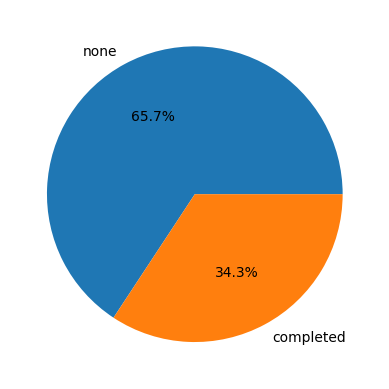

In [104]:
plt.pie(np.array(list(Group_E_Test_Course.values())), labels = list(Group_E_Test_Course.keys()), autopct='%1.1f%%')

                             math score  reading score  writing score
parental level of education                                          
associate's degree            70.348039      72.647059      72.039216
bachelor's degree             69.866667      71.819048      72.266667
high school                   65.381395      69.223256      66.772093
master's degree               71.026667      71.973333      71.746667
some college                  68.642857      70.941964      69.473214
some high school              64.197740      66.943503      65.293785


Text(0.5, 1.0, 'parental level of education')

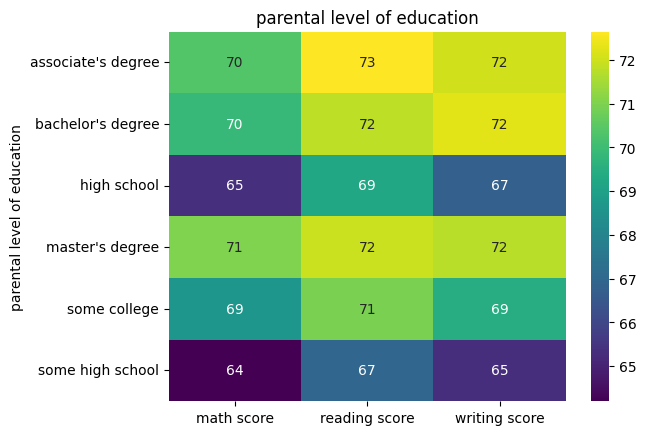

In [122]:
#Free_Reduced = Data[Data["lunch"] == "free/reduced"]
Heat_map_data = Data.pivot_table(index = "parental level of education", values=['math score', 'reading score', 'writing score'])
print(Heat_map_data)
sb.heatmap(Heat_map_data, annot = True, cmap = "viridis")
plt.title("parental level of education")

                         math score  reading score  writing score
test preparation course                                          
completed                 70.334302      74.726744      75.808140
none                      66.486280      68.103659      65.643293


Text(0.5, 1.0, 'Test preparation course')

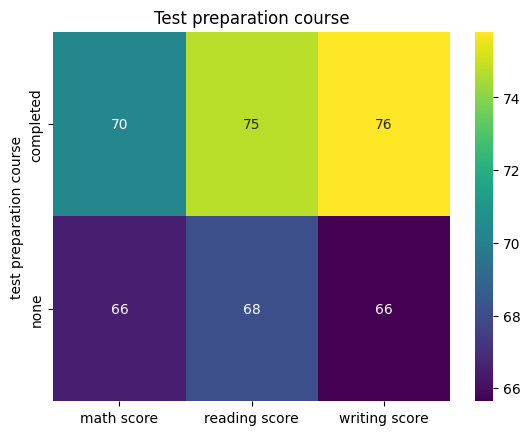

In [123]:
Heat_map_data = Data.pivot_table(index = "test preparation course", values=['math score', 'reading score', 'writing score'])
print(Heat_map_data)
sb.heatmap(Heat_map_data, annot = True, cmap = "viridis")
plt.title("Test preparation course")

### Data Preprocessing


> There are 5 columns that needs to be transformed by using OneHotEncoding.


*  Gender 
*  Race/ethnicity
*  Race/ethnicity
*  Parental level of education
*  Lunch
*  Test preparation course



In [233]:
Data_Array = Data
X = Data_Array.drop("writing score", axis = 1)
Y = Data_Array["writing score"]
OHE = OneHotEncoder()
OHE.fit(X[['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course']])
ct = ColumnTransformer(transformers = [("encoder", OneHotEncoder(categories = OHE.categories_), ['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'])], remainder = "passthrough")

X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state = 158, test_size = 0.2)

### Predicting Scores (Machine Learning)

> I'll predict the writing score and evalute the model's performance.





In [234]:
Regression = LinearRegression()
pipe = make_pipeline(ct, Regression)

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred

array([ 59.01,  66.78,  52.86,  57.16,  59.36,  41.55,  59.64,  59.43,
        68.9 ,  40.36,  50.21,  70.7 ,  33.84,  65.39,  93.06,  68.55,
        72.48,  49.9 ,  76.04,  70.23,  82.58,  66.8 ,  88.6 ,  51.26,
        72.74, 101.77,  65.93,  68.87,  68.97,  68.36,  42.58,  56.18,
        82.83,  73.87,  49.55,  66.46,  65.92,  80.82,  62.32,  79.7 ,
        68.73,  68.9 ,  70.89,  50.62,  86.23,  61.03,  59.27,  53.6 ,
        69.01,  55.92,  76.28,  85.32,  50.12,  72.98,  55.78,  71.13,
        50.02,  77.86,  69.06,  75.97,  63.48,  51.4 ,  57.87,  71.43,
        84.61,  68.01,  80.79,  86.89,  72.34,  64.48,  46.26,  71.65,
        76.62,  60.76,  19.19,  43.11,  67.76,  54.82,  66.61,  70.58,
        70.92,  90.72,  76.52,  79.46,  61.75,  47.51,  79.42,  84.89,
        58.88,  65.88,  72.12,  91.34,  66.38,  83.33,  61.53,  94.33,
        73.09,  60.42,  47.55,  54.19,  61.72,  81.35,  40.5 ,  38.94,
        56.58,  52.62,  67.22,  84.52,  91.26,  61.47,  64.35,  56.48,
      

###Evaluting Model's Performance


In [235]:
r2_score(y_test, y_pred)

0.9586821261920802